In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from sqlalchemy import create_engine
import funciones as fx
from pandas import ExcelWriter
from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msngo

from sklearn.tree import DecisionTreeRegressor

In [4]:
conn = fx.conexion_sqlalchemy()

In [6]:
#df_train = fx.selectViewTrain(conn)
df_test = fx.selectViewTest(conn)

In [ ]:
#gonzalo

df_complete = fx.selectViewComplete(conn)

In [7]:
df_test.head()

,Id,Vin,Year,Price,Mileage,City,City_Id,State,State_Id,Make,...,Model_Id,Doors,Fuel_Type,Fuel_Id,Engine_Displacement_CC,Engine_Displacement_CI,Engine_Number_Cylinders,Transmission_Speeds,Gama,Gama_Id
0,1,19VDE2E53EE000083,2014,8995,35725,El Paso,8307,TX,51,Acura,...,1227,4,gasoline,6,2354.000000,144.0,4,6,generalista,1
1,2,19VDE2E52DE000025,2013,8995,48851,El Paso,8307,TX,51,Acura,...,1227,4,gasoline,6,2354.000000,144.0,4,6,generalista,1
2,3,JH4CU2F84EC002686,2014,14490,34032,Greatneck,8550,NY,41,Acura,...,2397,4,gasoline,6,2359.737216,144.0,4,5,generalista,1
3,4,JH4CU2F44CC003220,2012,12921,58550,Boise,7867,ID,19,Acura,...,2394,4,gasoline,6,2359.737216,144.0,4,5,generalista,1
4,5,19VDE1F31EE009243,2014,14995,23454,Hackettstown,8583,NJ,38,Acura,...,1226,4,gasoline,6,1997.000000,121.9,4,5,generalista,1


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206042 entries, 0 to 206041
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Id                       206042 non-null  int64  
 1   Vin                      206042 non-null  object 
 2   Year                     206042 non-null  int64  
 3   Price                    206042 non-null  int64  
 4   Mileage                  206042 non-null  int64  
 5   City                     206042 non-null  object 
 6   City_Id                  206042 non-null  int64  
 7   State                    206042 non-null  object 
 8   State_Id                 206042 non-null  int64  
 9   Make                     206042 non-null  object 
 10  Make_Id                  206042 non-null  int64  
 11  Model                    206042 non-null  object 
 12  Model_Id                 206042 non-null  int64  
 13  Doors                    206042 non-null  int64  
 14  Fuel

In [9]:
#dividir dataset segun gama('generalista, premium, super-premium')

df_test_generalista = df_test[df_test.Gama == 'generalista']
df_test_generalista = df_test_generalista.select_dtypes(include='number')

df_test_premium1 = df_test[df_test.Gama == 'premium_1']
df_test_premium1 = df_test_premium1.select_dtypes(include='number')

df_test_premium2 = df_test[df_test.Gama == 'premium_2']
df_test_premium2 = df_test_premium2.select_dtypes(include='number')

df_test_premium3 = df_test[df_test.Gama == 'premium_3']
df_test_premium3 = df_test_premium3.select_dtypes(include='number')

df_test_premium4 = df_test[df_test.Gama == 'premium_4']
df_test_premium4 = df_test_premium4.select_dtypes(include='number')

df_test_premium5 = df_test[df_test.Gama == 'premium_5']
df_test_premium5 = df_test_premium5.select_dtypes(include='number')

df_test_premium6 = df_test[df_test.Gama == 'premium_6']
df_test_premium6 = df_test_premium6.select_dtypes(include='number')

df_test_premium7 = df_test[df_test.Gama == 'premium_7']
df_test_premium7 = df_test_premium7.select_dtypes(include='number')

df_test_premium8 = df_test[df_test.Gama == 'premium_8']
df_test_premium8 = df_test_premium8.select_dtypes(include='number')



#df_test_super_premium = df_test[df_test.Gama == 'super-premium']
#df_test_super_premium = df_test_super_premium.select_dtypes(include='number')

<AxesSubplot: xlabel='Price', ylabel='Make'>

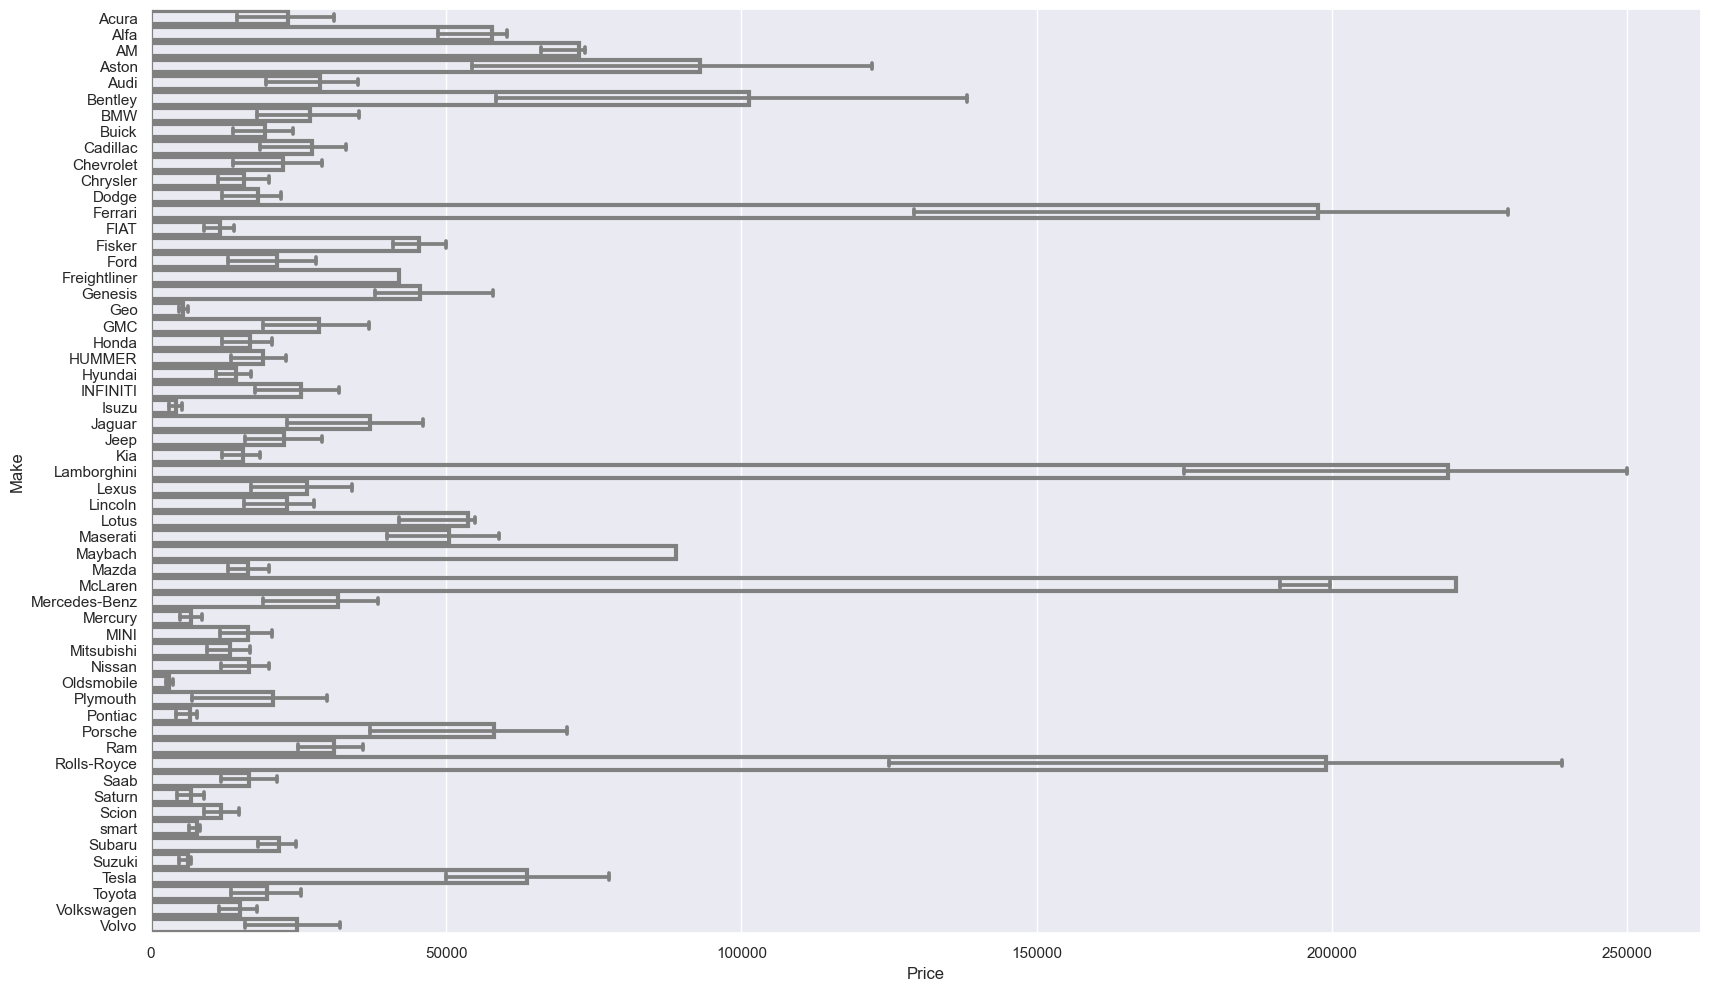

In [30]:
sns.set(rc = {'figure.figsize':(20,12)})
X = df_test.Price
Y = df_test.Make
sns.barplot(
    data=df_test, x=X, y=Y,
    errorbar=("pi", 50), capsize=.4, errcolor=".5",
    linewidth=3, edgecolor=".5", facecolor=(0, 0, 0, 0),
)

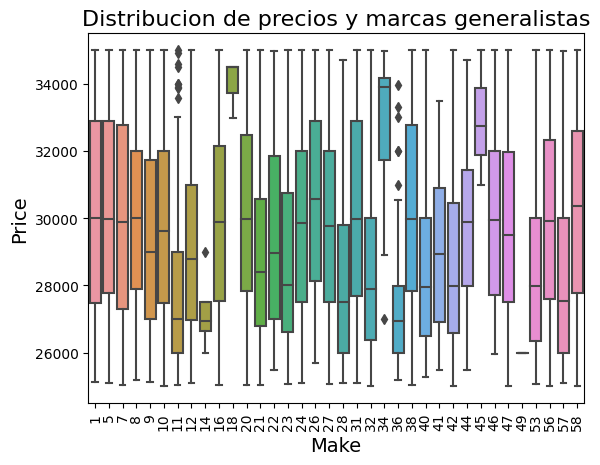

In [19]:
fx.boxplot_graph(df_test_premium1['Make_Id'], df_test_premium1['Price'], 'Distribucion de precios y marcas generalistas')

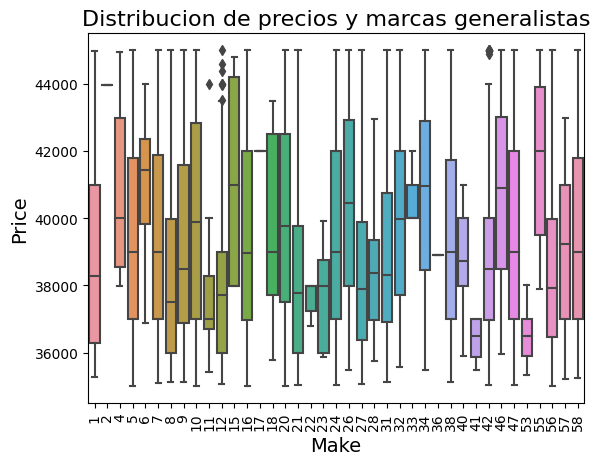

In [20]:
fx.boxplot_graph(df_test_premium2['Make_Id'], df_test_premium2['Price'], 'Distribucion de precios y marcas generalistas')

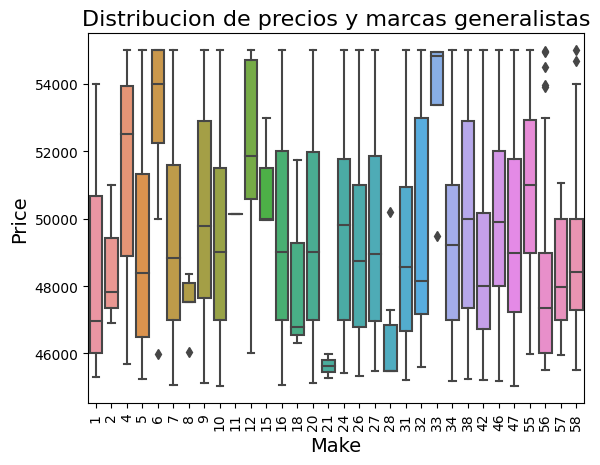

In [21]:
fx.boxplot_graph(df_test_premium3['Make_Id'], df_test_premium3['Price'], 'Distribucion de precios y marcas generalistas')

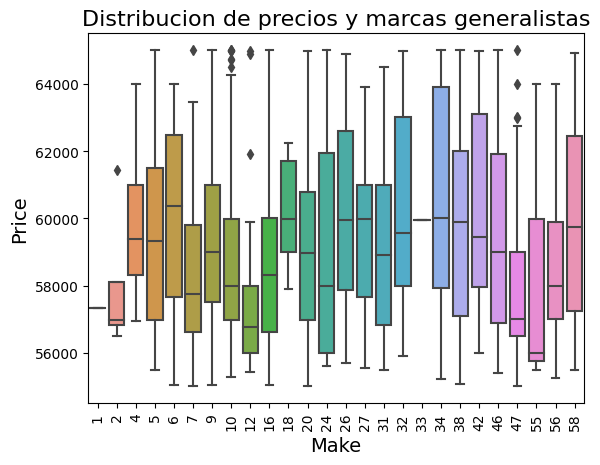

In [22]:
fx.boxplot_graph(df_test_premium4['Make_Id'], df_test_premium4['Price'], 'Distribucion de precios y marcas generalistas')

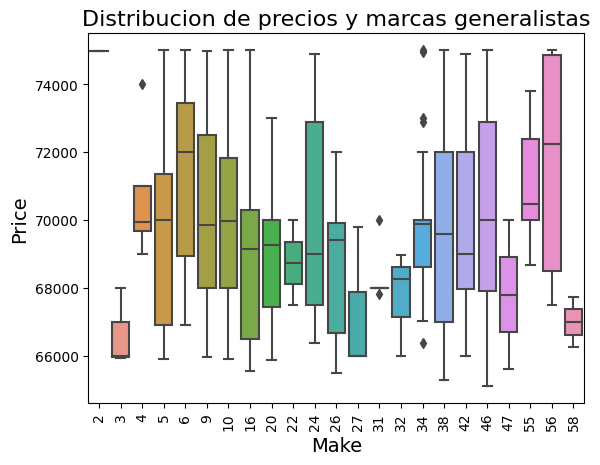

In [23]:
fx.boxplot_graph(df_test_premium5['Make_Id'], df_test_premium5['Price'], 'Distribucion de precios y marcas generalistas')

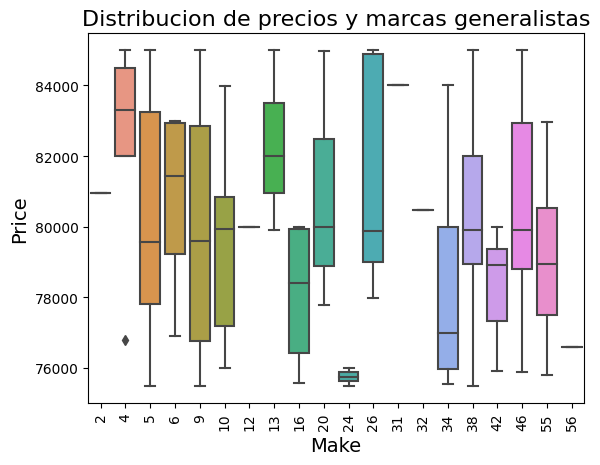

In [24]:
fx.boxplot_graph(df_test_premium6['Make_Id'], df_test_premium6['Price'], 'Distribucion de precios y marcas generalistas')

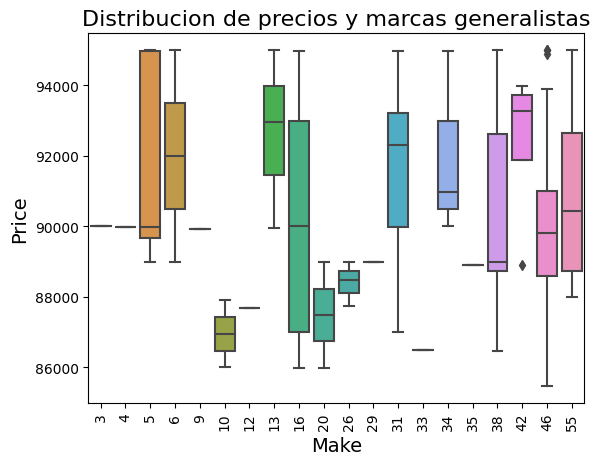

In [25]:
fx.boxplot_graph(df_test_premium7['Make_Id'], df_test_premium7['Price'], 'Distribucion de precios y marcas generalistas')

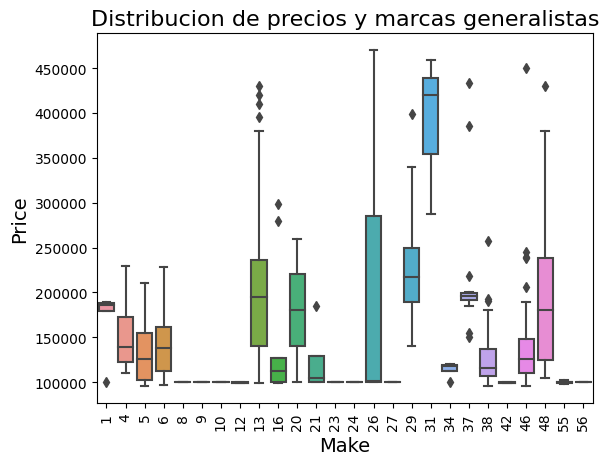

In [26]:
fx.boxplot_graph(df_test_premium8['Make_Id'], df_test_premium8['Price'], 'Distribucion de precios y marcas generalistas')

Los precios que estan fuera de la distribución normal se eliminaran del dataset
Método de puntuación Z para eliminar valores atípicos

In [1]:
#df_test_generalista_clean = fx.remove_outlier(df_test_generalista, 'Price', 1.5)
#df_test_generalista_clean.shape

In [10]:
df_train = fx.selectViewTrain(conn)

In [13]:
df_train.head()

,Id,Vin,Year,Price,Mileage,City,City_Id,State,State_Id,Make,...,Model_Id,Doors,Fuel_Type,Fuel_Id,Engine_Displacement_CC,Engine_Displacement_CI,Engine_Number_Cylinders,Transmission_Speeds,Gama,Gama_Id
0,1,19VDE1F52DE012636,2013,10888,19606,Long Island City,8923,NY,41,Acura,...,1226,4,gasoline,6,1997.000000,121.9,4,5,generalista,1
1,2,19VDE1F71EE003817,2014,10999,39922,Windsor,10156,CO,8,Acura,...,1226,4,gasoline,6,1997.000000,121.9,4,5,generalista,1
2,3,19UDE2F32GA001284,2016,14799,22142,Lindon,8893,UT,52,Acura,...,1229,4,gasoline,6,2359.737216,144.0,4,8,generalista,1
3,4,JH4CU2F83CC019895,2012,7989,105246,Miami,9057,FL,13,Acura,...,2394,4,gasoline,6,2359.737216,144.0,4,5,generalista,1
4,5,JH4CU2F64DC006203,2013,13995,32384,West Jordan,10092,UT,52,Acura,...,2393,4,gasoline,6,2359.737216,144.0,4,5,generalista,1


In [20]:
#dividir dataset segun gama('generalista, premium, super-premium')

df_train_generalista = df_train[df_train.Gama == 'generalista']
df_train_generalista = df_train_generalista.select_dtypes(include='number')

df_train_premium1 = df_train[df_train.Gama == 'premium_1']
df_train_premium1 = df_train_premium1.select_dtypes(include='number')

df_train_premium2 = df_train[df_train.Gama == 'premium_2']
df_train_premium2 = df_train_premium2.select_dtypes(include='number')

df_train_premium3 = df_train[df_train.Gama == 'premium_3']
df_train_premium3 = df_train_premium3.select_dtypes(include='number')

df_train_premium4 = df_train[df_train.Gama == 'premium_4']
df_train_premium4 = df_train_premium4.select_dtypes(include='number')

df_train_premium5 = df_train[df_train.Gama == 'premium_5']
df_train_premium5 = df_train_premium5.select_dtypes(include='number')

df_train_premium6 = df_train[df_train.Gama == 'premium_6']
df_train_premium6 = df_train_premium6.select_dtypes(include='number')

df_train_premium7 = df_train[df_train.Gama == 'premium_7']
df_train_premium7 = df_train_premium7.select_dtypes(include='number')

df_train_premium8 = df_train[df_train.Gama == 'premium_8']
df_train_premium8 = df_train_premium8.select_dtypes(include='number')

In [21]:
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score, confusion_matrix


In [22]:
X_train_model = df_train_generalista.drop(columns = ['Price'])
y_train_model = df_train_generalista['Price']

clf_dt = DecisionTreeRegressor().fit(X_train_model, y_train_model)

X_test_model = df_test_generalista.drop(columns = ['Price'])
y_test_model = df_test_generalista['Price']

y_hat_dt = clf_dt.predict(X_test_model)
print(f'''Reporte para DecisionTreeRegressor
RMSE: {np.sqrt(mean_squared_error(y_test_model, y_hat_dt))}
MAE: {median_absolute_error(y_test_model, y_hat_dt)}
R2 Score: {r2_score(y_test_model, y_hat_dt)}''')

Reporte para DecisionTreeRegressor
RMSE: 5810.8130999179275
MAE: 3812.0
R2 Score: -0.2410878920990498


In [26]:
X_train_model = df_train_premium1.drop(columns = ['Price'])
y_train_model = df_train_premium1['Price']

clf_dt = DecisionTreeRegressor().fit(X_train_model, y_train_model)

from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score, confusion_matrix

X_test_model = df_test_premium1.drop(columns = ['Price'])
y_test_model = df_test_premium1['Price']

y_hat_dt = clf_dt.predict(X_test_model)
print(f'''Reporte para DecisionTreeRegressor
RMSE: {np.sqrt(mean_squared_error(y_test_model, y_hat_dt))}
MAE: {median_absolute_error(y_test_model, y_hat_dt)}
R2 Score: {r2_score(y_test_model, y_hat_dt)}''')

Reporte para DecisionTreeRegressor
RMSE: 4488.202432736591
MAE: 3188.0
R2 Score: -1.5207561628923303


In [25]:
X_train_model = df_train_premium2.drop(columns = ['Price'])
y_train_model = df_train_premium2['Price']

clf_dt = DecisionTreeRegressor().fit(X_train_model, y_train_model)

from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score, confusion_matrix

X_test_model = df_test_premium2.drop(columns = ['Price'])
y_test_model = df_test_premium2['Price']

y_hat_dt = clf_dt.predict(X_test_model)
print(f'''Reporte para DecisionTreeRegressor
RMSE: {np.sqrt(mean_squared_error(y_test_model, y_hat_dt))}
MAE: {median_absolute_error(y_test_model, y_hat_dt)}
R2 Score: {r2_score(y_test_model, y_hat_dt)}''')

Reporte para DecisionTreeRegressor
RMSE: 4364.345792213892
MAE: 3003.0
R2 Score: -1.3725755594205804


In [27]:
X_train_model = df_train_premium3.drop(columns = ['Price'])
y_train_model = df_train_premium3['Price']

clf_dt = DecisionTreeRegressor().fit(X_train_model, y_train_model)

from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score, confusion_matrix

X_test_model = df_test_premium3.drop(columns = ['Price'])
y_test_model = df_test_premium3['Price']

y_hat_dt = clf_dt.predict(X_test_model)
print(f'''Reporte para DecisionTreeRegressor
RMSE: {np.sqrt(mean_squared_error(y_test_model, y_hat_dt))}
MAE: {median_absolute_error(y_test_model, y_hat_dt)}
R2 Score: {r2_score(y_test_model, y_hat_dt)}''')

Reporte para DecisionTreeRegressor
RMSE: 4314.446109086427
MAE: 3010.0
R2 Score: -1.3036602536741113


In [28]:
X_train_model = df_train_premium4.drop(columns = ['Price'])
y_train_model = df_train_premium4['Price']

clf_dt = DecisionTreeRegressor().fit(X_train_model, y_train_model)

from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score, confusion_matrix

X_test_model = df_test_premium4.drop(columns = ['Price'])
y_test_model = df_test_premium4['Price']

y_hat_dt = clf_dt.predict(X_test_model)
print(f'''Reporte para DecisionTreeRegressor
RMSE: {np.sqrt(mean_squared_error(y_test_model, y_hat_dt))}
MAE: {median_absolute_error(y_test_model, y_hat_dt)}
R2 Score: {r2_score(y_test_model, y_hat_dt)}''')

Reporte para DecisionTreeRegressor
RMSE: 4022.497390031759
MAE: 2521.0
R2 Score: -1.2741957169548197


In [24]:
#premium 5

X_train_model = df_train_premium5.drop(columns = ['Price'])
y_train_model = df_train_premium5['Price']

clf_dt = DecisionTreeRegressor().fit(X_train_model, y_train_model)

from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score, confusion_matrix

X_test_model = df_test_premium5.drop(columns = ['Price'])
y_test_model = df_test_premium5['Price']

y_hat_dt = clf_dt.predict(X_test_model)
print(f'''Reporte para DecisionTreeRegressor
RMSE: {np.sqrt(mean_squared_error(y_test_model, y_hat_dt))}
MAE: {median_absolute_error(y_test_model, y_hat_dt)}
R2 Score: {r2_score(y_test_model, y_hat_dt)}''')

Reporte para DecisionTreeRegressor
RMSE: 4107.345447284287
MAE: 2923.0
R2 Score: -1.1788823072189683


In [29]:
X_train_model = df_train_premium6.drop(columns = ['Price'])
y_train_model = df_train_premium6['Price']

clf_dt = DecisionTreeRegressor().fit(X_train_model, y_train_model)

from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score, confusion_matrix

X_test_model = df_test_premium6.drop(columns = ['Price'])
y_test_model = df_test_premium6['Price']

y_hat_dt = clf_dt.predict(X_test_model)
print(f'''Reporte para DecisionTreeRegressor
RMSE: {np.sqrt(mean_squared_error(y_test_model, y_hat_dt))}
MAE: {median_absolute_error(y_test_model, y_hat_dt)}
R2 Score: {r2_score(y_test_model, y_hat_dt)}''')

Reporte para DecisionTreeRegressor
RMSE: 4162.049011902368
MAE: 3110.0
R2 Score: -1.1947983724898288


In [30]:
X_train_model = df_train_premium7.drop(columns = ['Price'])
y_train_model = df_train_premium7['Price']

clf_dt = DecisionTreeRegressor().fit(X_train_model, y_train_model)

from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score, confusion_matrix

X_test_model = df_test_premium7.drop(columns = ['Price'])
y_test_model = df_test_premium7['Price']

y_hat_dt = clf_dt.predict(X_test_model)
print(f'''Reporte para DecisionTreeRegressor
RMSE: {np.sqrt(mean_squared_error(y_test_model, y_hat_dt))}
MAE: {median_absolute_error(y_test_model, y_hat_dt)}
R2 Score: {r2_score(y_test_model, y_hat_dt)}''')

Reporte para DecisionTreeRegressor
RMSE: 4195.188397636829
MAE: 3006.0
R2 Score: -1.4905677985232493


In [31]:
X_train_model = df_train_premium8.drop(columns = ['Price'])
y_train_model = df_train_premium8['Price']

clf_dt = DecisionTreeRegressor().fit(X_train_model, y_train_model)

from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score, confusion_matrix

X_test_model = df_test_premium8.drop(columns = ['Price'])
y_test_model = df_test_premium8['Price']

y_hat_dt = clf_dt.predict(X_test_model)
print(f'''Reporte para DecisionTreeRegressor
RMSE: {np.sqrt(mean_squared_error(y_test_model, y_hat_dt))}
MAE: {median_absolute_error(y_test_model, y_hat_dt)}
R2 Score: {r2_score(y_test_model, y_hat_dt)}''')

Reporte para DecisionTreeRegressor
RMSE: 77271.09330269671
MAE: 29980.0
R2 Score: -0.2876650228983453
